![](Image1.jpg){width=12% fig-align="center"}

# MACHINE LEARNING                                                  

# Midterm exam 2024

## Instructions: Read Carefully!

- **[Use this Jupyter notebook]{.underline}** to complete the required tasks and submit it to Moodle.

- The notebook should contain the code with your analysis and **it must be reproducible**. 

- The **most important part of your work is the comments and interpretation** of the analysis results obtained. Do not include uncommented figures. Remember to include a conclusion section at the end.                          

- **[Use OBS to record your screen and webcam]{.underline}**. Upload the video file (max. 500Mb) to Moodle. Alternatively, make sure to copy it to one of the pendrives that will be provided.

## Statement 

### Dataset 

+ Look for your student code in the `student_codes.txt` file. Use the corresponding zip file cpntaining the data files for your analysis.  **IMPORTANT:** An exam done with a wrong dataset implies a failed exam.                        

+ Load the training set **ML_midterm_tr_XX.csv** and the test set **ML_midterm_ts_XX.csv** corresponding to your student code.

+ The dataset contains 7 input variables: six numerical and one categorical. The output numeric variable is called Y.

### External Code and Imports

+ The first code cell below contains standard imports that we have used in the sessions. With these imports you should be able to do all the tasks in the exam; that is not to say that you need to use all of them, and you are invited to use extra imports if you feel the need.

+ We have also included a Python script `auxiliary_code.py` with two functions called `ResidualPlots` and `explore_outliers` that will be available when you run the second cell in this notebook. 

### Goals of the Analysis                               

1.  Perform an explanatory analysis of the training data.  
  **IMPORTANT:** we have provided you with separate training and test sets for reproducibility. But the training set may still need basic preprocessing! Do not assume that the training data has been thoroughly cleaned. The test set, on the other hand, can be used as it is.  

1. Fit a linear regression model to the training set to predict the output variable Y using X1, ..., X7 as input variables.           

1. Analyze the significance of the model coefficients and the residuals plots.

1. Obtain the training, test and validation scores for this model. Store them in a model dictionary like we have done in the course sessions. 

1. Using the previous results fit a second linear model using the categorical input but keeping only the significant numerical inputs from the first model. In this second model include quadratic and interaction terms for its input variables. Train the model and make sure that you keep only significant terms in your final model. Repeat the residual analysis, and performance measures for this model,

1. Fit a regression tree model for the training dataset. Use `max_depth` as a hyperparameter (ranging from 1 to 10) and perform a grid search to find its optimal value. What is the selected tree depth?

1. Obtain the training, test and validation scores for the tree model and add them to the dictionary.

1. Analyze the residuals plots for this model. 

1. What are the most important input variables for this model?

1. Compare the performance of the different regression models using the validation and test metrics and also the residualplots. Draw conclusions from this comparison.


In [8]:
%cd ./00_previous_exams/Midterm2024

/wd/00_previous_exams/Midterm2024


In [63]:
### Load necessary modules -------------------------------

# interactive plotting
%config InlineBackend.figure_format = 'png' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
import statsmodels.api as sm


# Data management libraries
import numpy as np 
import pandas as pd
import scipy.stats as stats

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Feature selection libraries
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFECV

# Machine learning libraries
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Connecting statsmodels with sklearn via sklearn2pmml and patsy 
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn2pmml.statsmodels import StatsModelsRegressor

# Others
import warnings

# patsy for lineal model formula language
import patsy as ps
from patsy_utils.patsy_formulaic_transformer import FormulaTransformer


from sklearn.tree import DecisionTreeRegressor, plot_tree

In [64]:
%run -i "auxiliary_code.py"

##  Perform an explanatory analysis of the training data.  



We begin by loading the data sets for training and test and looking at their first rows.

In [12]:
dfTR = pd.read_csv("./data/ML_midterm_tr_1.csv")
print(dfTR.head(3))

         X1        X2        X3         X4        X5        X6 X7         Y
0 -1.416924  0.022170  0.076047  -6.105536  0.099986 -0.058571  B -1.217963
1 -2.626367 -0.083067 -0.410911 -11.373946  0.036854 -0.104747  B  0.936219
2  7.443831 -0.019498  0.177184  28.179435 -0.048178 -0.195903  B  1.352122


In [13]:
dfTS = pd.read_csv("./data/ML_midterm_ts_1.csv")
print(dfTS.head(3))

         X1        X2        X3         X4        X5        X6 X7         Y
0 -8.104545 -0.014192  0.116363 -27.220679  0.035153  0.646177  B -0.761636
1  3.920557  0.001465 -0.411669  17.841217  0.060565  0.267324  B  0.017037
2 -2.778927  0.036699  0.674120  -9.289416 -0.036311  0.234459  B -0.457599


We identify the numerical, categorical inputs and the output. 

In [14]:
output = "Y"
num_inputs = ["X1", "X2", "X3", "X4", "X5", "X6"]
cat_inputs = ["X7"]
inputs = num_inputs + cat_inputs

A first numerical EDA of the training data:

In [15]:
dfTR.describe()

,X1,X2,X3,X4,X5,X6,Y
count,1610.000000,1611.000000,1611.000000,1612.000000,1608.000000,1610.000000,1612.000000
mean,0.003771,-0.000440,0.000751,0.020380,0.000206,0.007179,0.953785
std,4.059791,0.040936,0.533618,16.667614,0.054255,0.508336,1.826855
min,-13.473841,-0.126164,-4.767451,-51.581439,-0.566700,-1.637143,-4.634302
25%,-2.687244,-0.028962,-0.326466,-11.368059,-0.034982,-0.321509,-0.300303
50%,0.047534,0.000061,-0.000158,0.440730,-0.000038,-0.014175,0.827049
75%,2.801219,0.027931,0.334949,11.448714,0.032337,0.340893,1.985087
max,12.002434,0.124392,2.999517,51.071758,0.533244,3.312419,9.919518


In [16]:
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1610 non-null   float64
 1   X2      1611 non-null   float64
 2   X3      1611 non-null   float64
 3   X4      1612 non-null   float64
 4   X5      1608 non-null   float64
 5   X6      1610 non-null   float64
 6   X7      1612 non-null   object 
 7   Y       1612 non-null   float64
dtypes: float64(7), object(1)
memory usage: 100.9+ KB


We check for missing values. There are very few, som we remove them.

In [17]:
dfTR.isna().sum(axis=0)
# df.dropna(inplace=True)
# df.isna().sum(axis=0)

X1    2
X2    1
X3    1
X4    0
X5    4
X6    2
X7    0
Y     0
dtype: int64

In [18]:
dfTR.dropna(inplace=True)
# dfTR.isna().sum(axis=0)

The categorical input is binary. We will convert it to `category` type:

In [19]:
dfTR[cat_inputs].value_counts()

X7
B     809
A     798
Name: count, dtype: int64

In [20]:
object_cols = dfTR.select_dtypes("object").columns
dfTR[object_cols] = dfTR[object_cols].astype("category")
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 0 to 1611
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      1607 non-null   float64 
 1   X2      1607 non-null   float64 
 2   X3      1607 non-null   float64 
 3   X4      1607 non-null   float64 
 4   X5      1607 non-null   float64 
 5   X6      1607 non-null   float64 
 6   X7      1607 non-null   category
 7   Y       1607 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 102.1 KB


Now we define the `XTR` and YTR` datasets for the code below:

In [21]:
XTR = dfTR[inputs]
YTR = dfTR[output]

and we make an initial pairplot that reveals the existence of outliers in several inputs:

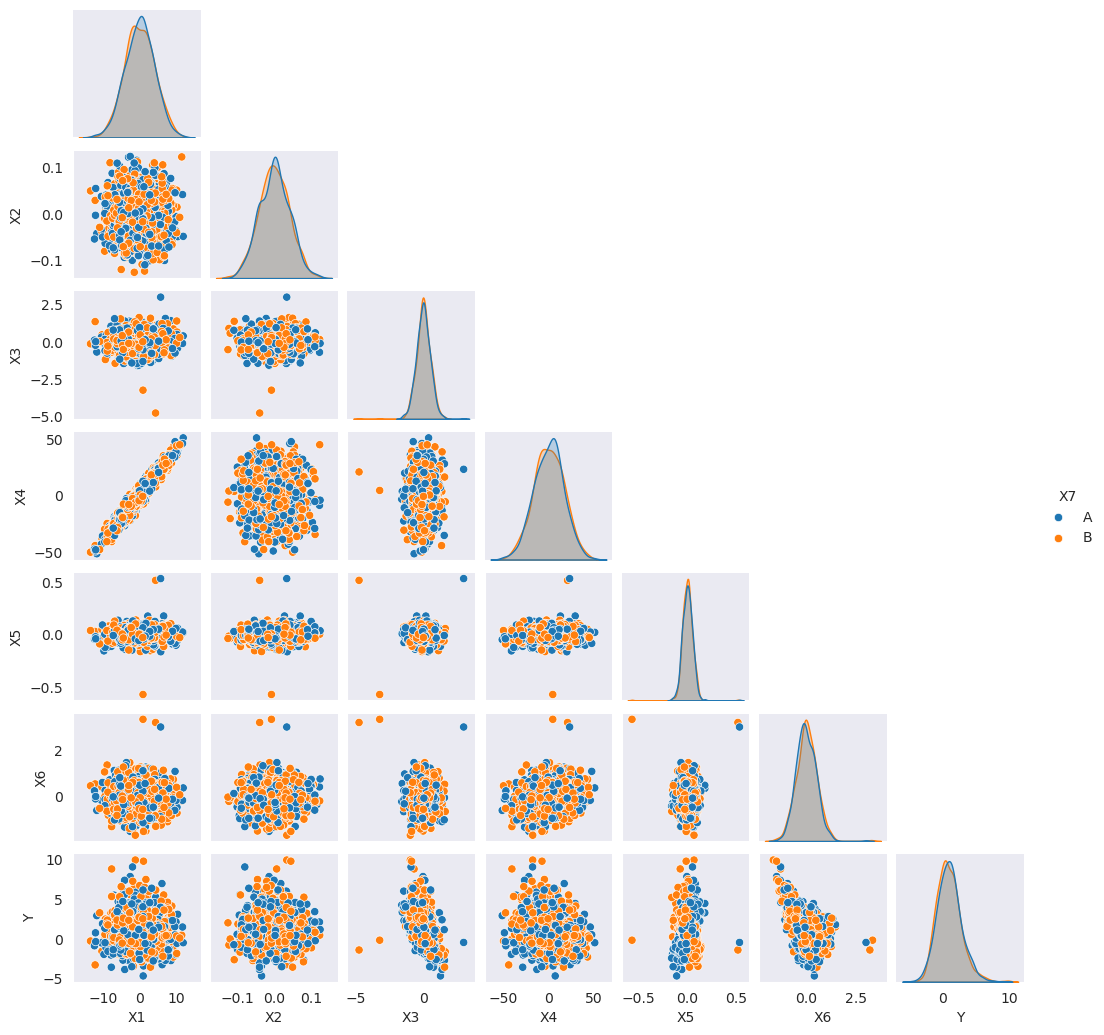

In [22]:
sns.set_style("dark")
sns.pairplot(dfTR, corner=True, height=1.5, aspect=1, hue=cat_inputs[0]);

We use the `explore_outliers` function with the numeric inputs in `XTR`. 

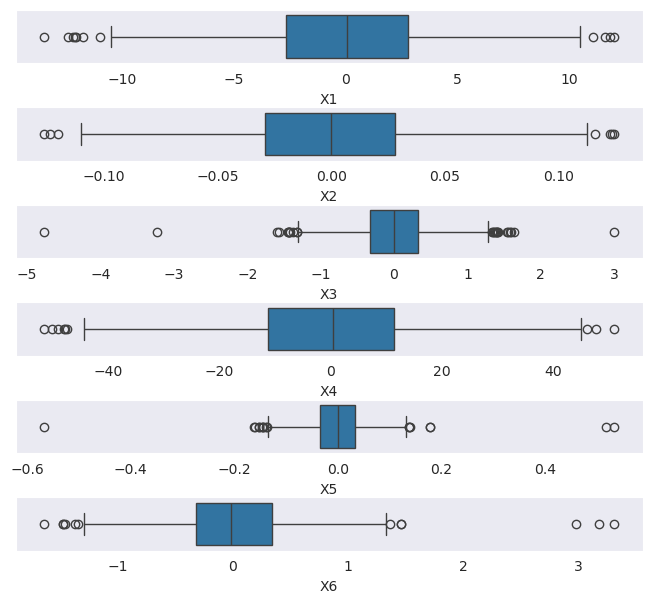

In [23]:
from matplotlib.cbook import boxplot_stats

out_XTR = explore_outliers(XTR, num_inputs)


Then we use the result to drop all the outliers, removing them from `XTR` and  also the corresponding output values in `YTR`.


/tmp/ipykernel_43/2240691641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTR.drop(out_XTR_indices, axis=0, inplace=True)


{'X1': {'values': array([], dtype=float64), 'positions': [], 'indices': []},
 'X2': {'values': array([0.11261046]), 'positions': [483], 'indices': [507]},
 'X3': {'values': array([-1.30702134, -1.30936033]),
  'positions': [49, 1515],
  'indices': [52, 1583]},
 'X4': {'values': array([], dtype=float64), 'positions': [], 'indices': []},
 'X5': {'values': array([-0.13527844]), 'positions': [474], 'indices': [497]},
 'X6': {'values': array([], dtype=float64), 'positions': [], 'indices': []}}

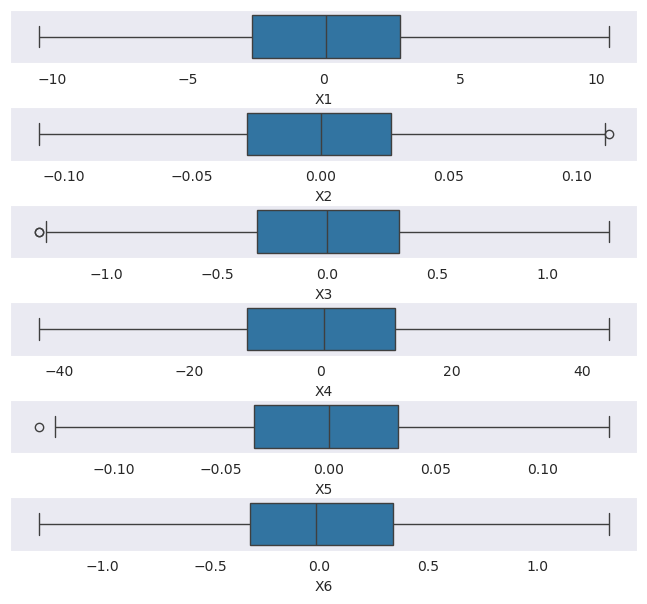

In [24]:
out_XTR_indices = set([k for var in num_inputs for k in out_XTR[var]["indices"] ])

XTR.drop(out_XTR_indices, axis=0, inplace=True)

# Also make sure to remove the corresponding output values in `YTR`.

YTR.drop(out_XTR_indices, axis=0, inplace=True) # Always keep in mind that you need to keep `YTR` updated.

explore_outliers(XTR, num_inputs)

We update the `dfTR` set after these changes:

In [25]:
dfTR = XTR
dfTR[output] = YTR

And we repeat the pairplot to check the result and to look for relations between inputs. The very high correlation between two of the inputs is remarkable.

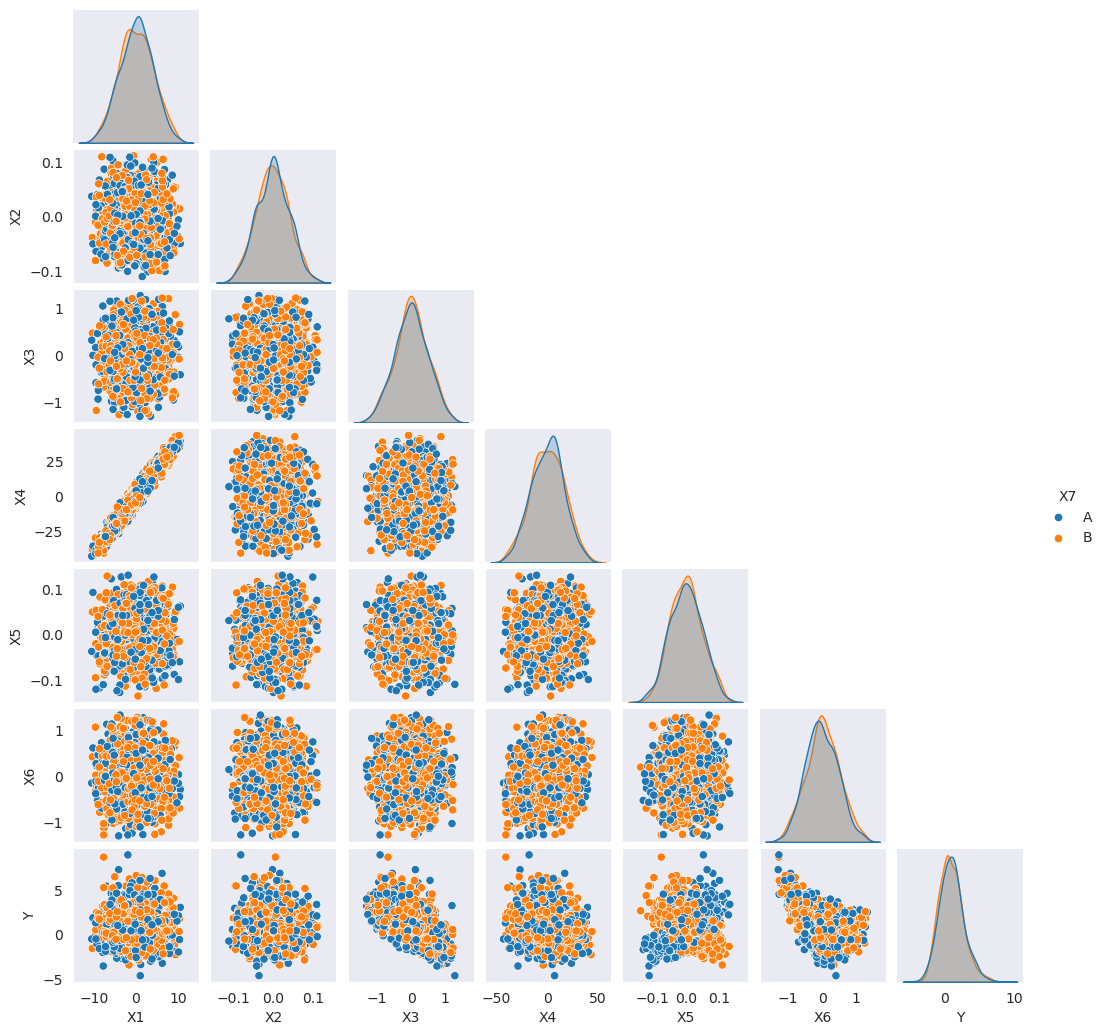

In [26]:
sns.pairplot(dfTR, corner=True, height=1.5, aspect=1, hue=cat_inputs[0]);

Let us find the correlated pair to remove one of those variables, and check the rest of correlations:

In [27]:
XTR[num_inputs].corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,-0.003189,-0.006372,0.971203,0.008750,-0.011738
X2,-0.003189,1.000000,0.015327,-0.011631,0.005010,-0.035634
X3,-0.006372,0.015327,1.000000,-0.005882,-0.005518,0.001660
X4,0.971203,-0.011631,-0.005882,1.000000,0.021813,0.226831
X5,0.008750,0.005010,-0.005518,0.021813,1.000000,0.055838
X6,-0.011738,-0.035634,0.001660,0.226831,0.055838,1.000000


In [28]:
dfTR.drop(columns="X4", inplace=True)
dfTS.drop(columns="X4", inplace=True)
num_inputs.remove("X4")
inputs = num_inputs + cat_inputs
inputs

['X1', 'X2', 'X3', 'X5', 'X6', 'X7']

Again be careful to keep the datasets updated after these operations.

In [29]:
XTR = dfTR[inputs]
YTR = dfTR[output]
XTS = dfTS[inputs]
YTS = dfTS[output]


## Fit a linear regression model to the training set to predict the output variable Y using X1, ..., X7 as input variables.           

We begin by defining the formula of the model using all the inputs:

In [30]:
model_Formula = " + ".join(inputs)
model_Formula

'X1 + X2 + X3 + X5 + X6 + X7'

Next we define the model pipeline

In [33]:

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lm_pipeline = Pipeline([
    ("formula", FormulaTransformer(model_Formula)),
    ("regressor", StatsModelsRegressor(OLS, fit_intercept = False))])

and we fit it:

In [34]:
lm_pipeline.fit(dfTR[inputs], dfTR[output])

,steps,"[('formula', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,formula,'X1 + X2 + X3 + X5 + X6 + X7'
,model_class,<class 'stats...ar_model.OLS'>
,fit_intercept,False


We store the model for the model dictionary and the performance code  below.

In [35]:
model = lm_pipeline._final_estimator
model

,model_class,<class 'stats...ar_model.OLS'>
,fit_intercept,False


## Analyze the significance of the model coefficients and the residuals plots.

The table of coefficients of the model appears below. Two of the numeric inputs and the categorical one have coefficients non significantly different from zero. The $R^2$ coefficient is approximately 0.6.

In [36]:
print(model.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     417.7
Date:                Wed, 25 Feb 2026   Prob (F-statistic):          2.96e-318
Time:                        10:27:25   Log-Likelihood:                -2295.3
No. Observations:                1541   AIC:                             4605.
Df Residuals:                    1534   BIC:                             4642.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9393      0.039     24.132      0.0

Let us look at the residual plots. You can see that:

+ They are not normal, as seen in the qq-plot.
+ The Fitted Values vs Residuals plots exhibits a quadratic pattern.
+ Similarly for the residuals vs X6 plot.
+ The residuals vs X5 plot shows an X-shaped pattern that could be an indicator of interactions with the categorical input.
+ The rest of the residual plots are not showing noticeable patterns.

--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X1', 'X2', 'X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


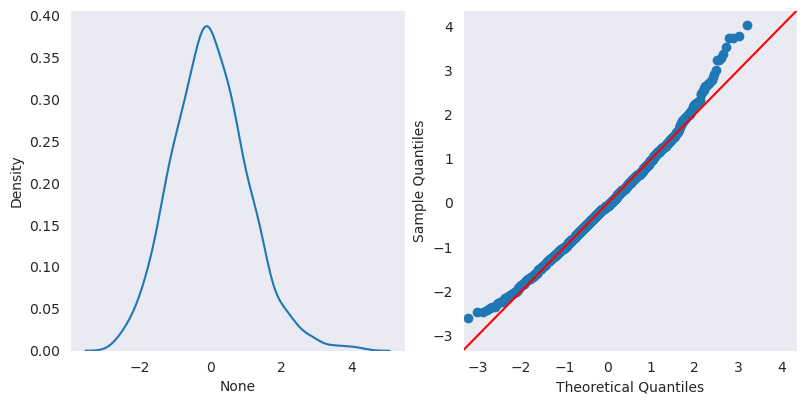

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


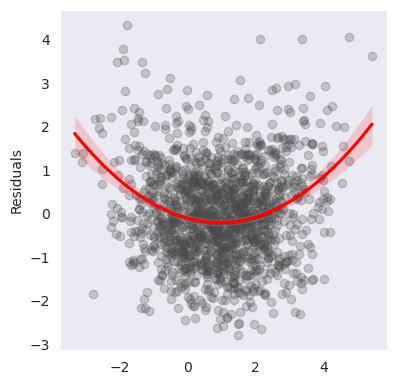

--------------------------------------------------
Numerical inputs: ['X1', 'X2', 'X3', 'X5', 'X6']
--------------------------------------------------


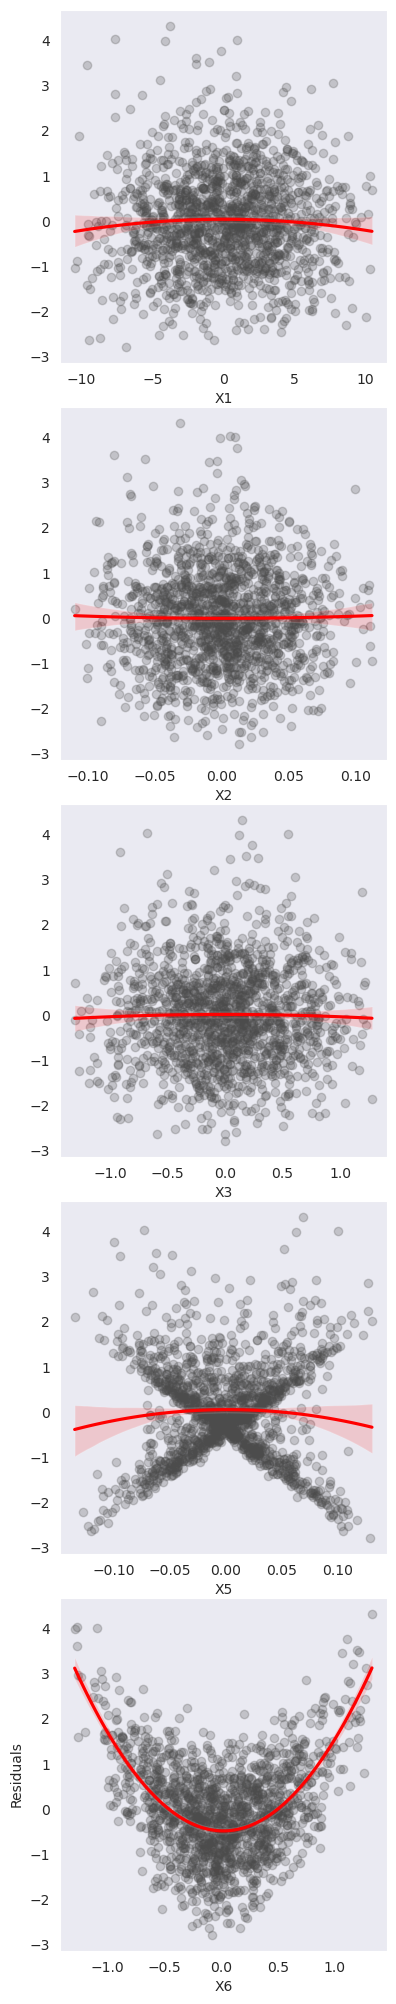

--------------------------------------------------
Categorical inputs: ['X7']
--------------------------------------------------


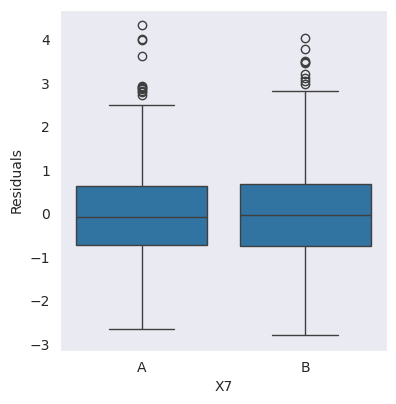

In [37]:
ResidualPlots(model=model, data=dfTR, num_inputs=num_inputs, cat_inputs=cat_inputs, output=output)

## Training, test and validation scores for this model. 

We create dataset to store the predictions of these and the other models.

In [38]:
dfTR_eval = XTR.copy()
dfTR_eval[output] = YTR
dfTS_eval = XTS.copy()
dfTS_eval[output] = YTS

And these are the actual predictions. Be careful to give them a name that distinguishes them from other models. 

In [39]:
dfTR_eval['lm1_pred'] = lm_pipeline.predict(XTR)
dfTS_eval['lm1_pred'] = lm_pipeline.predict(XTS)

Now we create the model dictionary.

In [40]:
modelDict={}

Compute the training score:

In [41]:
lm_train_score = -np.sqrt(mean_squared_error(YTR, dfTR_eval["lm1_pred"]))
lm_train_score

np.float64(-1.0730627966311066)

The validation scores (note the metric):

In [42]:
lm_val_scores = cross_val_score(lm_pipeline, XTR, YTR, cv=10, scoring="neg_root_mean_squared_error")
lm_val_scores

array([-1.0356904 , -1.0669309 , -1.07829477, -1.0592183 , -1.07535191,
       -1.05864762, -1.17463099, -0.99356472, -1.14229134, -1.08472539])

And finally the test score:

In [43]:
lm_test_score = -np.sqrt(mean_squared_error(YTS, dfTS_eval["lm1_pred"]))
lm_test_score

np.float64(-1.1337972762713564)

With this we can enter the model in the dictionary:

In [44]:
modelDict['lm1'] = {'val_scores':lm_val_scores, 'test_score':lm_test_score}

## Second Linear Model

*Using the previous results fit a second linear model using the categorical input but keeping only the significant numerical inputs from the first model. In this second model include interaction terms for all its input variables and quadratic terms for the numeric inputs. Train the model and update the formula to make sure that you keep only significant terms in your final model. Repeat the residual analysis, and performance measures for this model.*

We update the model formula as instructed in the statement. Note that we have dropped the numeric variables that were non significant, but we keep the categorical input to explore posible interactions:

In [45]:
model_Formula = "(X3 + X5 + X6 +  X7) * (X3 + X5 + X6 +  X7) + I(X3**2)+ I(X5**2) + I(X6**2)"
model_Formula

'(X3 + X5 + X6 +  X7) * (X3 + X5 + X6 +  X7) + I(X3**2)+ I(X5**2) + I(X6**2)'

And we train a model with this formula:

In [47]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lm_pipeline = Pipeline([
    ("formula", FormulaTransformer(model_Formula)),
    ("regressor", StatsModelsRegressor(OLS, fit_intercept = False))])


In [48]:
lm_pipeline.fit(dfTR[inputs], dfTR[output])

model = lm_pipeline._final_estimator
model


,model_class,<class 'stats...ar_model.OLS'>
,fit_intercept,False


Now the table of coefficients shows many non significant coefficients. But there is a quadratic term and an interaction with the factor that are significant. Note also the jump in the value of $R^2$.

In [49]:
print(model.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.669e+04
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        10:27:58   Log-Likelihood:                 1386.8
No. Observations:                1541   AIC:                            -2746.
Df Residuals:                    1527   BIC:                            -2671.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4994      0.005    101.006      0.0

Therefore for the final model we keep only the significant terms from this one:

In [50]:
model_Formula = "X3 + X5 + X6 + X7 + X5:X7 + I(X6**2)" 
model_Formula

'X3 + X5 + X6 + X7 + X5:X7 + I(X6**2)'

In [53]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lm_pipeline = Pipeline([
    ("formula", FormulaTransformer(model_Formula)),
    ("regressor", StatsModelsRegressor(OLS, fit_intercept = False))])

lm_pipeline.fit(dfTR[inputs], dfTR[output])

model = lm_pipeline._final_estimator
model



,model_class,<class 'stats...ar_model.OLS'>
,fit_intercept,False


Now the table of coefficients shows that all the included terms are significant and the $R^2$ value is really high:

In [54]:
print(model.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 7.936e+04
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        10:28:18   Log-Likelihood:                 1382.1
No. Observations:                1541   AIC:                            -2750.
Df Residuals:                    1534   BIC:                            -2713.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5011      0.004    124.440      0.0

The residual plots for this model are also telling of a very good fit: normal residuals and no remarkable patterns in the residuals.

--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


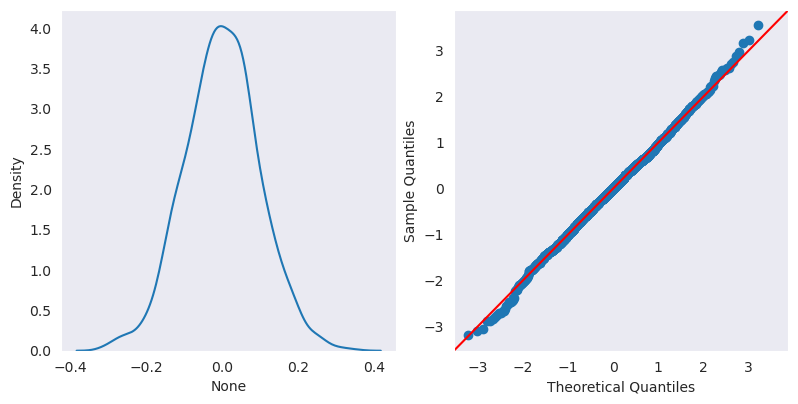

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


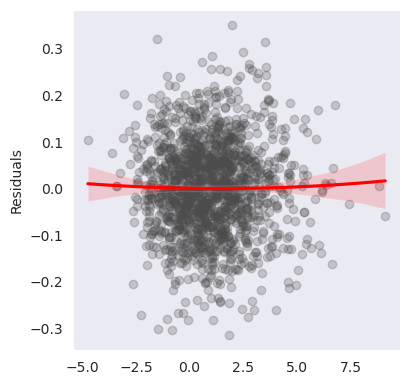

--------------------------------------------------
Numerical inputs: ['X3', 'X5', 'X6']
--------------------------------------------------


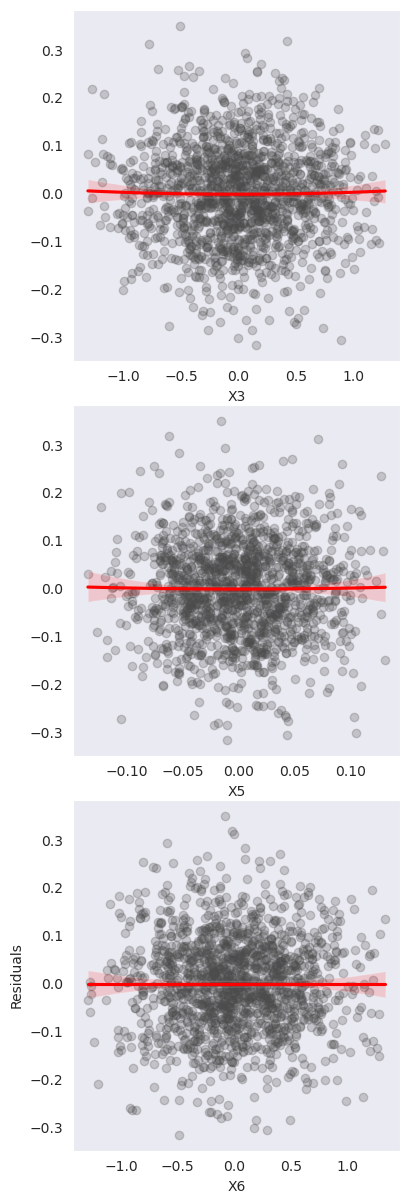

--------------------------------------------------
Categorical inputs: ['X7']
--------------------------------------------------


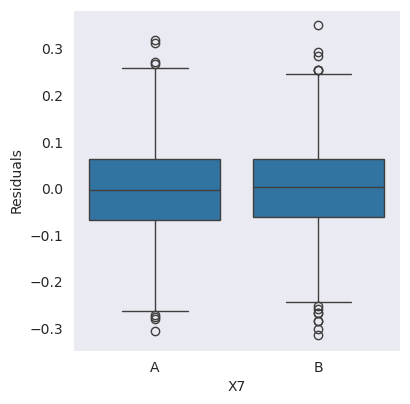

In [55]:
ResidualPlots(model=model, data=dfTR, num_inputs=["X3", "X5", "X6"], cat_inputs=cat_inputs, output=output)

We compute and store the predicitions of this model:

In [56]:
dfTR_eval['lm2_pred'] = lm_pipeline.predict(XTR)
dfTS_eval['lm2_pred'] = lm_pipeline.predict(XTS)

We use them to obtain the training, test and validation scores in the next cells:

In [57]:
lm_train_score = -np.sqrt(mean_squared_error(YTR, dfTR_eval["lm2_pred"]))
lm_train_score

np.float64(-0.0986852011412062)

In [58]:
lm_val_scores = cross_val_score(lm_pipeline, XTR, YTR, cv=10, scoring="neg_root_mean_squared_error")
lm_val_scores

array([-0.10302976, -0.1003026 , -0.1032809 , -0.10160784, -0.09599759,
       -0.09908814, -0.0919676 , -0.10432333, -0.0939619 , -0.09749362])

In [59]:
lm_test_score = -np.sqrt(mean_squared_error(YTS, dfTS_eval["lm2_pred"]))
lm_test_score

np.float64(-0.09766049353178927)

And add them to the model dictionary:

In [60]:
modelDict['lm2'] = {'val_scores':lm_val_scores, 'test_score':lm_test_score}

# Regression Tree Model

*Fit a regression tree model for the training dataset. Use `max_depth` as a hyperparameter (ranging from 1 to 10) and perform a grid search to find its optimal value. What is the selected tree depth?*

We begin by defining a grid for the hyperparameter:

In [61]:
DT_hyp_grid = {'DT__max_depth': np.arange(1, 10)}

And we create the model's pipeline and grid search framework:

In [65]:
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())]) # Preprocess the variables when training the model 

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, num_inputs),
        ('cat', categorical_transformer, cat_inputs)
        ])


DT_pipe = Pipeline(steps=[('preprocessor',preprocessor), 
                        ('DT', DecisionTreeRegressor(
                                                    min_samples_split=5, 
                                                    min_samples_leaf=5, 
                                                    random_state=1))]) 

nFolds = 10

DT_grid = GridSearchCV(estimator= DT_pipe, 
                       param_grid=DT_hyp_grid, 
                       n_jobs=-1, 
                       scoring='neg_root_mean_squared_error',
                       cv=nFolds) 


Now fitting the model is straightforward:

In [66]:
DT_grid.fit(XTR, YTR) 

model = DT_grid
model

,estimator,Pipeline(step...om_state=1))])
,param_grid,"{'DT__max_depth': array([1, 2, ..., 6, 7, 8, 9])}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


The selected max depth for the model is:

In [67]:
model.best_params_

{'DT__max_depth': np.int64(6)}

## Obtain the training, test and validation scores for the tree model and add them to the dictionary.

And now we compute the training, validation and test scores for the model:

In [68]:
dfTR_eval['DT_pred'] = model.predict(XTR)
dfTS_eval['DT_pred'] = model.predict(XTS)

Y_DT_TR_pred = dfTR_eval['DT_pred']

In [69]:
DT_train_score = -np.sqrt(mean_squared_error(YTR, dfTR_eval["DT_pred"]))
DT_train_score

np.float64(-0.7869684432972662)

In [70]:
DT_val_scores = cross_val_score(model, XTR, YTR, scoring="neg_root_mean_squared_error", cv=10)
DT_val_scores

array([-0.92011729, -1.02937799, -1.005983  , -1.01964001, -0.91110937,
       -0.95967844, -0.97418247, -0.91130824, -0.90557769, -1.02361876])

In [71]:
DT_test_score = -np.sqrt(mean_squared_error(YTS, dfTS_eval['DT_pred']))
DT_test_score

np.float64(-0.9884304074639139)

Note the difference between training and validation or test errors, that are a **symptom of overfitting** for this model. We add the model information to the dictionary:

In [72]:
modelDict['DT'] = {'val_scores':DT_val_scores, 'test_score':DT_test_score}

## Analyze the residuals plots for this model. 

And then the residuals diagnostic plots. They are all indicators of a quite good fit, except for one plot that clearly shows that the model has missed the interaction between inputs.

--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X1', 'X2', 'X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


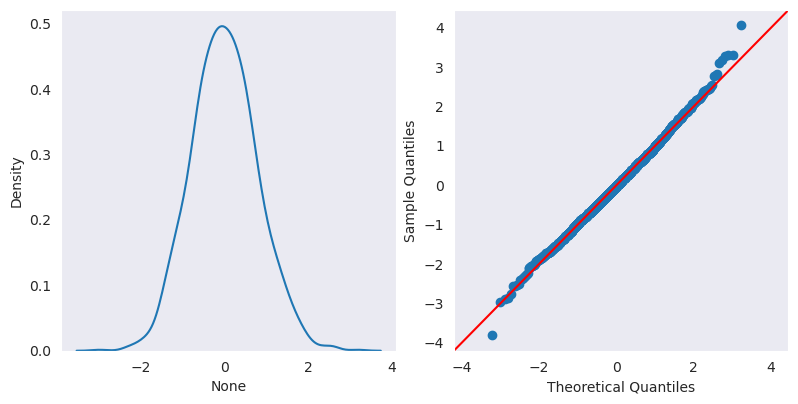

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


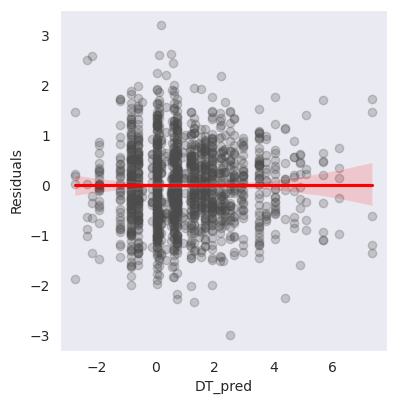

--------------------------------------------------
Numerical inputs: ['X1', 'X2', 'X3', 'X5', 'X6']
--------------------------------------------------


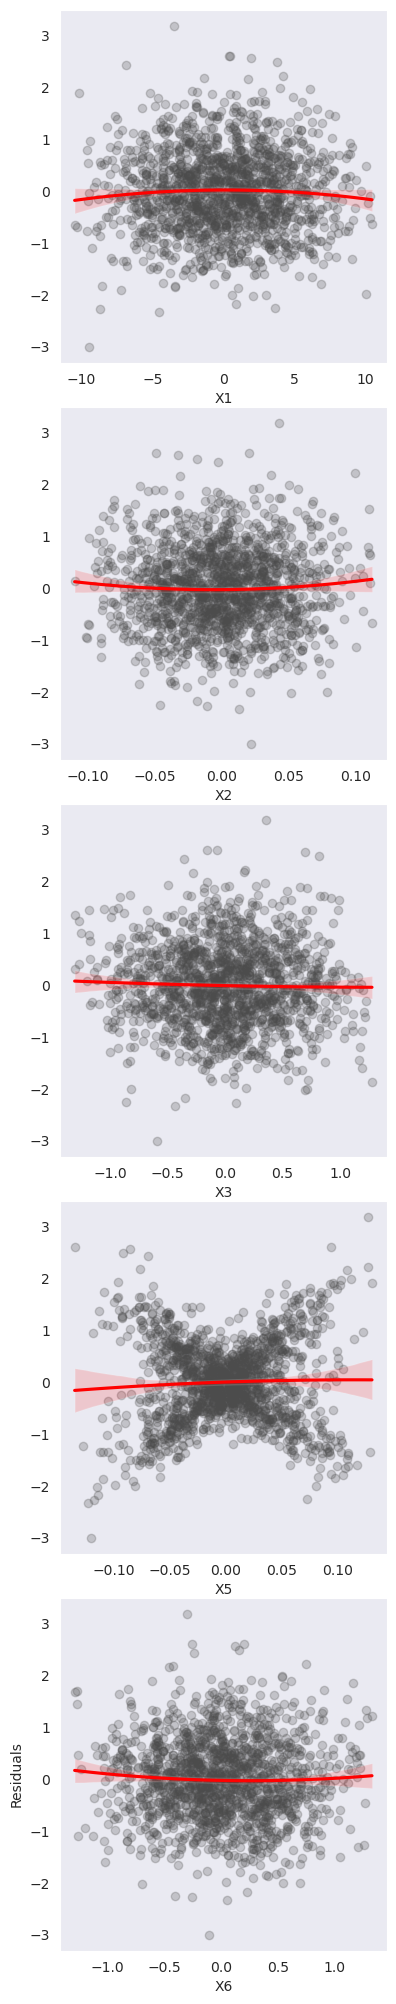

--------------------------------------------------
Categorical inputs: ['X7']
--------------------------------------------------


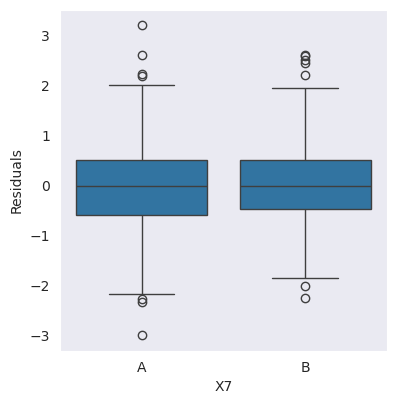

In [73]:
DT_fitted = Y_DT_TR_pred
DT_resid = YTR - DT_fitted
ResidualPlots(resid=DT_resid, fitted=DT_fitted, data=XTR, num_inputs=num_inputs, cat_inputs=cat_inputs)

## What are the most important input variables for this model?

Let us get the feature importances for this tree model:

In [74]:
DT_grid.best_estimator_['DT'].feature_importances_
DT_pipe.named_steps["preprocessor"].fit(XTR)
XTR_preproc_names = DT_pipe.named_steps["preprocessor"].get_feature_names_out().tolist()

In [75]:
var_importances = pd.DataFrame({'var':XTR_preproc_names, 
                                'importance': DT_grid.best_estimator_['DT'].feature_importances_}
                                ).sort_values(by="importance", ascending = False)
var_importances

,var,importance
4,num__X6,0.540319
2,num__X3,0.418866
3,num__X5,0.022688
5,cat__X7_A,0.011362
1,num__X2,0.006010
0,num__X1,0.000754
6,cat__X7_B,0.000000


As you can see the most important numeric inputs and the position of the input factor agree with the results of linear regression, even though as we have seen the model is not picking up the interaction. 

# Model Comparison

*Compare the performance of the different regression models using the validation and test metrics and also the residualplots. Draw conclusions from this comparison.*

The validation scores for the model can be compared by drawing parallel boxplots:

In [76]:
val_scores = {ml:(modelDict[ml])['val_scores'] for ml in modelDict.keys()}

In [77]:
model_val_scores = pd.DataFrame(val_scores)
model_val_scores

,lm1,lm2,DT
0,-1.035690,-0.103030,-0.920117
1,-1.066931,-0.100303,-1.029378
2,-1.078295,-0.103281,-1.005983
3,-1.059218,-0.101608,-1.019640
4,-1.075352,-0.095998,-0.911109
5,-1.058648,-0.099088,-0.959678
6,-1.174631,-0.091968,-0.974182
7,-0.993565,-0.104323,-0.911308
8,-1.142291,-0.093962,-0.905578
9,-1.084725,-0.097494,-1.023619


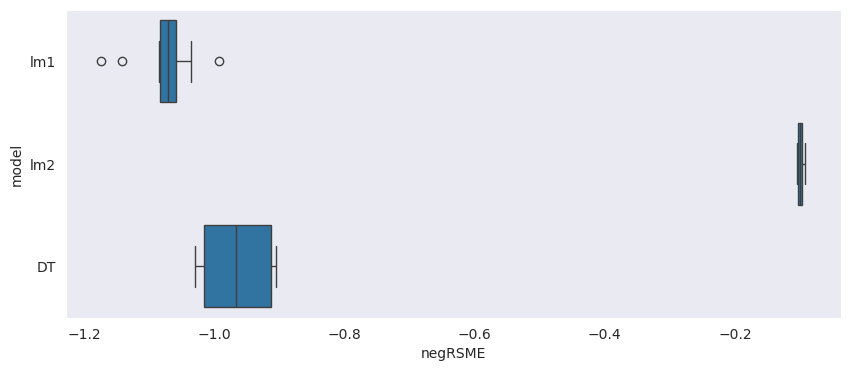

In [78]:
metric = "negRSME"
fig = plt.figure(figsize=(10, 4))
sns.boxplot(model_val_scores.melt(var_name="model", value_name=metric), x=metric, y ="model");

And the different test scores fo the models are:

In [79]:
test_scores = {ml:(modelDict[ml])['test_score'] for ml in modelDict.keys()}
test_scores

{'lm1': np.float64(-1.1337972762713564),
 'lm2': np.float64(-0.09766049353178927),
 'DT': np.float64(-0.9884304074639139)}

## Conclusions

The validation scores confirm what could be anticipated from the residual plots and coefficient tables: the second linear model is a very good fit for this dataset and it is clearly superior to the other two models. This is also confirmed by the test scores, which again indicate a clear advantage of the second linear model. The first linear model is definitely too rigid to account for the non linear relations between these variables, while the tree model is harmed by its failure to detect the interaction and probable overfitting.
